In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf
import datetime as date
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
yf.pdr_override()
df = yf.download("SBIN.NS", start='2015-01-01', end=date.datetime.now())


[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,312.450012,315.000000,310.700012,314.000000,290.288177,6138488
2015-01-02,314.350006,318.299988,314.350006,315.250000,291.443817,9935094
2015-01-05,316.250000,316.799988,312.100006,312.750000,289.132568,9136716
2015-01-06,310.000000,311.100006,298.700012,299.899994,277.252930,15329257
2015-01-07,300.000000,302.549988,295.149994,300.149994,277.484039,15046745


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-06,835.000000,836.000000,803.000000,807.799988,807.799988,35283557
2024-05-07,812.000000,814.650024,793.200012,801.900024,801.900024,16725013
2024-05-08,802.599976,822.000000,799.500000,810.799988,810.799988,27908322
2024-05-09,811.900024,839.650024,803.549988,819.799988,819.799988,49290254
2024-05-10,827.000000,832.049988,815.599976,817.349976,817.349976,20543142


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,312.450012,315.000000,310.700012,314.000000,290.288177,6138488
1,2015-01-02,314.350006,318.299988,314.350006,315.250000,291.443817,9935094
2,2015-01-05,316.250000,316.799988,312.100006,312.750000,289.132568,9136716
3,2015-01-06,310.000000,311.100006,298.700012,299.899994,277.252930,15329257
4,2015-01-07,300.000000,302.549988,295.149994,300.149994,277.484039,15046745


In [6]:
#removed date column
df = df.drop(['Date', 'Adj Close'], axis= 1)
df.head()

,Open,High,Low,Close,Volume
0,312.450012,315.000000,310.700012,314.000000,6138488
1,314.350006,318.299988,314.350006,315.250000,9935094
2,316.250000,316.799988,312.100006,312.750000,9136716
3,310.000000,311.100006,298.700012,299.899994,15329257
4,300.000000,302.549988,295.149994,300.149994,15046745


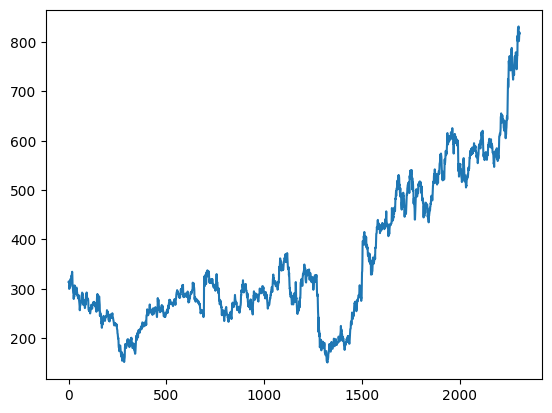

In [7]:
plt.plot(df.Close)



In [8]:
df

,Open,High,Low,Close,Volume
0,312.450012,315.000000,310.700012,314.000000,6138488
1,314.350006,318.299988,314.350006,315.250000,9935094
2,316.250000,316.799988,312.100006,312.750000,9136716
3,310.000000,311.100006,298.700012,299.899994,15329257
4,300.000000,302.549988,295.149994,300.149994,15046745
...,...,...,...,...,...
2303,835.000000,836.000000,803.000000,807.799988,35283557
2304,812.000000,814.650024,793.200012,801.900024,16725013
2305,802.599976,822.000000,799.500000,810.799988,27908322
2306,811.900024,839.650024,803.549988,819.799988,49290254


In [9]:
#moving avg indicator(ma100)
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2303    706.715001
2304    708.649501
2305    710.640501
2306    712.697001
2307    714.728000
Name: Close, Length: 2308, dtype: float64

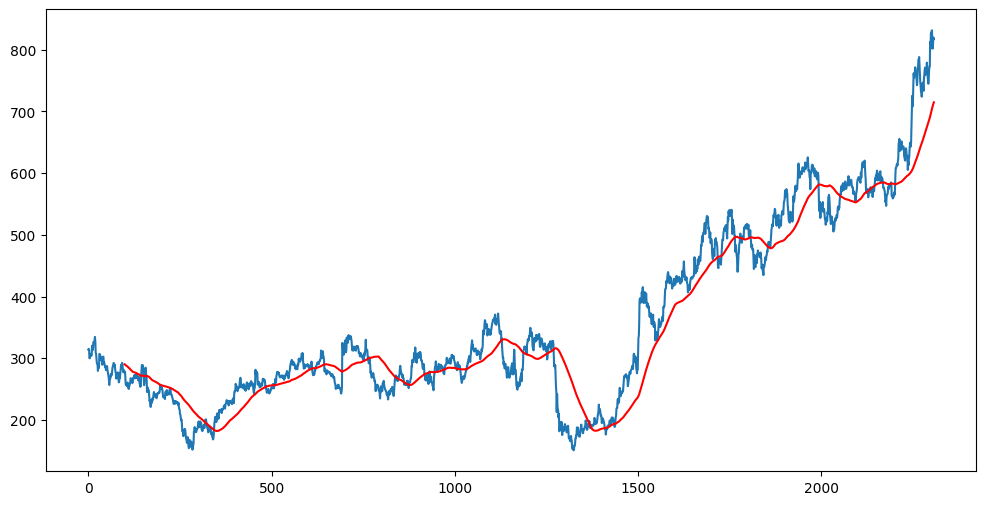

In [10]:
#plotting of ma100
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [11]:
ma200 = df.Close.rolling(200).mean()
ma200



0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2303    644.371751
2304    645.438501
2305    646.546251
2306    647.717001
2307    648.881751
Name: Close, Length: 2308, dtype: float64

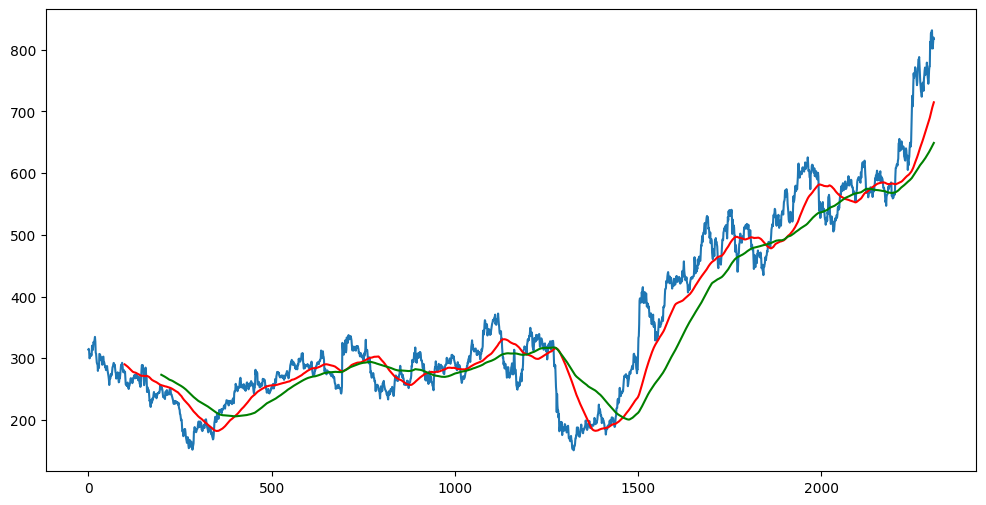

In [12]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
#showing data that how many row and columns we have 
df.shape

(2308, 5)

In [14]:
#Splitting Data into Training and Tensting(70%data for training & 30% data is for testing)

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1615, 1)
(693, 1)


In [15]:
data_training

,Close
0,314.000000
1,315.250000
2,312.750000
3,299.899994
4,300.149994
...,...
1610,429.100006
1611,431.049988
1612,431.700012
1613,430.000000


In [16]:
len(data_testing)


693

In [17]:
#for stck lstm model we can't provide "Close(or any data)" so i give (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))


In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.56492383],
       [0.56925208],
       [0.56059557],
       ...,
       [0.97247236],
       [0.96658589],
       [0.9593144 ]])

In [19]:
data_training_array.shape

(1615, 1)

In [20]:
#creating list for coordinate train
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train,  y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1515, 100, 1)

In [22]:
#MACHINE LEARNIG MODEL...# last (x_train.shape[1], 1)<--(this 1 is for 'close' column can be different for diffrent data)
model = Sequential()
model.add(LSTM(units= 50, activation='relu', return_sequences= True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units= 60, activation='relu', return_sequences= True,))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation='relu', return_sequences= True,))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation='relu'))
model.add(Dropout(0.5))

#dense for connect all upper layers
model.add(Dense(units= 1))


c:\Users\anshg\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
''' 
learn optimizers(adam must)
      what is epochs
'''

' \nlearn optimizers(adam must)\n      what is epochs\n'

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - loss: 0.0888
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 0.0147
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0129
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 0.0099
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0088
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0092
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0078
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0071
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0069
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0058
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0068
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 0.0072
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0070
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0056
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - l

In [26]:
model.save('keras_model24.h5')

In [27]:
data_testing.head()

,Close
1615,420.899994
1616,422.049988
1617,428.899994
1618,423.299988
1619,429.950012


In [28]:
data_training.tail(100)

,Close
1515,389.500000
1516,395.600006
1517,406.250000
1518,407.250000
1519,390.149994
...,...
1610,429.100006
1611,431.049988
1612,431.700012
1613,430.000000


In [29]:
data_training.tail(100)


,Close
1515,389.500000
1516,395.600006
1517,406.250000
1518,407.250000
1519,390.149994
...,...
1610,429.100006
1611,431.049988
1612,431.700012
1613,430.000000


In [30]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [31]:
final_df.head()

,Close
0,389.500000
1,395.600006
2,406.250000
3,407.250000
4,390.149994


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.12067249],
       [0.13280939],
       [0.15399919],
       [0.15598884],
       [0.12196575],
       [0.13151613],
       [0.13002389],
       [0.15161158],
       [0.13290885],
       [0.109033  ],
       [0.12087147],
       [0.11689216],
       [0.11709114],
       [0.10395941],
       [0.10953042],
       [0.09888576],
       [0.07819337],
       [0.07610426],
       [0.08416233],
       [0.07590528],
       [0.08724633],
       [0.06167927],
       [0.05242739],
       [0.0564067 ],
       [0.0635694 ],
       [0.07053319],
       [0.0831675 ],
       [0.04914441],
       [0.04317545],
       [0.05909268],
       [0.05322324],
       [0.04805013],
       [0.        ],
       [0.02417428],
       [0.02755672],
       [0.02198565],
       [0.00457618],
       [0.00129326],
       [0.01551928],
       [0.01512138],
       [0.03074011],
       [0.04814958],
       [0.06874251],
       [0.0607839 ],
       [0.04904495],
       [0.04327497],
       [0.04506565],
       [0.052

In [33]:
input_data.shape

(793, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(693, 100, 1)
(693,)


In [36]:
# making Prediction

y_predicted = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [37]:
y_predicted.shape

(693, 1)

In [38]:
y_test

array([0.18314761, 0.1854357 , 0.19906484, 0.18792276, 0.20115401,
       0.19230003, 0.22423394, 0.20483482, 0.21100276, 0.23408275,
       0.25487466, 0.22483088, 0.212495  , 0.20801828, 0.19419022,
       0.19737362, 0.19558294, 0.20364108, 0.19100676, 0.18434141,
       0.18076006, 0.15489456, 0.16046556, 0.17658177, 0.17389573,
       0.16295263, 0.16633507, 0.18672902, 0.19339431, 0.20105449,
       0.20075605, 0.20403897, 0.20334258, 0.19946279, 0.20393951,
       0.20582965, 0.20692399, 0.20722243, 0.22881018, 0.26830482,
       0.24920414, 0.21607641, 0.2187624 , 0.21886192, 0.24064859,
       0.22264225, 0.23428173, 0.2308993 , 0.26094308, 0.2470155 ,
       0.24432946, 0.26721048, 0.27029448, 0.25537207, 0.2567648 ,
       0.25696377, 0.27934738, 0.30670512, 0.30411859, 0.3218265 ,
       0.33645047, 0.31705134, 0.34033025, 0.34639873, 0.34639873,
       0.35346198, 0.36549936, 0.37863115, 0.34321528, 0.34480698,
       0.37176682, 0.38370474, 0.39554321, 0.40111421, 0.38678

In [39]:
y_predicted

array([[0.20001295],
       [0.19946158],
       [0.19813454],
       [0.19652271],
       [0.19482622],
       [0.19355574],
       [0.1927656 ],
       [0.19336712],
       [0.19508618],
       [0.19748963],
       [0.20091431],
       [0.20593826],
       [0.21173221],
       [0.21678478],
       [0.21977073],
       [0.21970469],
       [0.21659768],
       [0.21139282],
       [0.20541506],
       [0.19956659],
       [0.19426851],
       [0.18968883],
       [0.18527305],
       [0.18088889],
       [0.17718333],
       [0.17458746],
       [0.1729404 ],
       [0.17205693],
       [0.1723528 ],
       [0.17416993],
       [0.1775513 ],
       [0.18209648],
       [0.1872932 ],
       [0.19254941],
       [0.19732577],
       [0.2013374 ],
       [0.20446791],
       [0.20663917],
       [0.20795356],
       [0.20916468],
       [0.21246707],
       [0.21808216],
       [0.22417113],
       [0.22871582],
       [0.2303166 ],
       [0.22939995],
       [0.22671482],
       [0.223

In [40]:
scaler.scale_

array([0.00198965])

In [41]:
scale_factor = 1/0.00337098
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

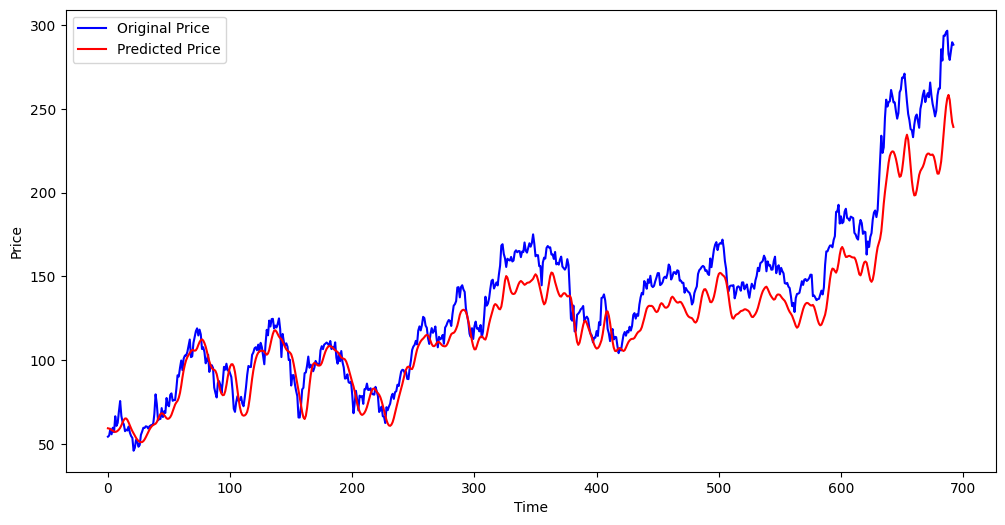

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
